## Visual Comparison Between Different Classification Methods in Shogun

Notebook by Youssef Emad El-Din (Github ID: <a href="https://github.com/youssef-emad/">youssef-emad</a>)

This Notebook demonstartes different classification methods in shogun.

1. <a href ="#section1">Data Generation and Visualization</a>
2. <a href ="#section2">Support Vector Machine</a>
 1. <a href ="#section2a">Linear SVM</a>
 2. <a href ="#section2b">Gaussian Kernel</a>
 3. <a href ="#section2c">Sigmoid Kernel</a>
 4. <a href ="#section2d">Polynomial Kernel</a>
3. <a href ="#section3">Naive Bayes</a>
4. <a href ="#section4">Nearest Neighbors</a>
5. <a href ="#section5">Linear Discriminant Analysis</a>
6. <a href ="#section6">Quadratic Discriminat Analysis</a>
7. <a href ="#section7">Gaussian Process</a>
 1. <a href ="#section7a">Logit Likelihood model</a>
 2. <a href ="#section7b">Probit Likelihood model</a>

In [1]:
%matplotlib inline
%pylab inline
from modshogun import *
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## <a id = "section1">Data Generation and Visualization</a>

In [2]:
class1 = randn(2,100) + 2
class2 = randn(2,100) - 2

labels_1 = concatenate(array((ones(100, dtype=double), -ones(100, dtype=double))))
features_1 = class1
features_1 = hstack((features_1,class2))

Second Dataset is generated using generate_classification_toy_data method defined in the <a href="http://www.shogun-toolbox.org/static/notebook/current/gaussian_processes.html">Gaussian Processes notebook</a>.

In [3]:
def generate_classification_toy_data(n_train=400, mean_a=np.asarray([0, 0]), std_dev_a=1.0, mean_b=3, std_dev_b=0.5):

    # positive examples are distributed normally
    X1 = (np.random.randn(n_train, 2)*std_dev_a+mean_a).T

    # negative examples have a "ring"-like form
    r = np.random.randn(n_train)*std_dev_b+mean_b
    angle = np.random.randn(n_train)*2*np.pi
    X2 = np.array([r*np.cos(angle)+mean_a[0], r*np.sin(angle)+mean_a[1]])

    # stack positive and negative examples in a single array
    X_train = np.hstack((X1,X2))

    # label positive examples with +1, negative with -1
    y_train = np.zeros(n_train*2)
    y_train[:n_train] = 1
    y_train[n_train:] = -1

    return X_train, y_train

features_2, labels_2=generate_classification_toy_data()

Data visualization methods.

In [4]:
def plot_binary_data(X_train, y_train):
    plt.plot(X_train[0, np.argwhere(y_train == 1)], X_train[1, np.argwhere(y_train == 1)], 'ro')
    plt.plot(X_train[0, np.argwhere(y_train == -1)], X_train[1, np.argwhere(y_train == -1)], 'bo')

In [5]:
def compute_plot_isolines(classifier,features,size=200,fading=True):
    data = features.get_feature_matrix()
    
    x1=linspace(1.2*min(data[0]), 1.2*max(data[0]), size)
    x2=linspace(1.2*min(data[1]), 1.2*max(data[1]), size)

    x, y=meshgrid(x1, x2)

    plot_features=RealFeatures(array((ravel(x), ravel(y))))
    
    if fading == True:
        plot_labels=classifier.apply(plot_features).get_values()
    else:
        plot_labels=classifier.apply(plot_features).get_labels()
    z=plot_labels.reshape((size, size))
    return x,y,z

In [6]:
def visualize_models(classifier_1,classifier_2,fading=True):
    figure(figsize=(15,5))
    subplot(121)
    x1,y1,z1 = compute_plot_isolines(classifier_1,shogun_features_1,fading=fading)
    pcolor(x1,y1,z1,cmap='RdBu_r')
    contour(x1, y1, z1, linewidths=1, colors='black')
    plot_binary_data(features_1, labels_1)

    subplot(122)
    x2,y2,z2 = compute_plot_isolines(classifier_2,shogun_features_2,fading=fading)
    pcolor(x2,y2,z2,cmap='RdBu_r')
    contour(x2, y2, z2, linewidths=1, colors='black')
    plot_binary_data(features_2, labels_2)
    

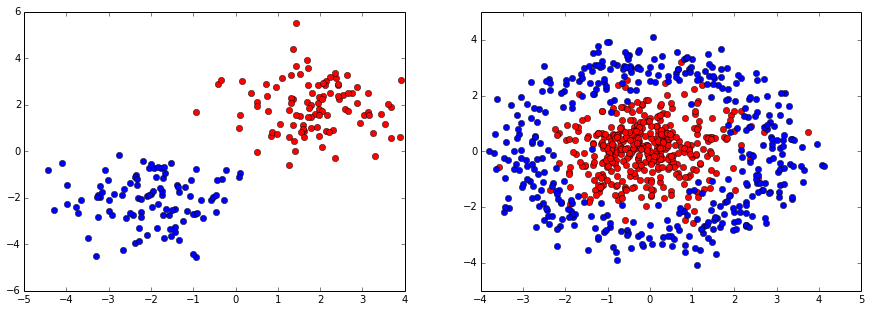

In [7]:
figure(figsize=(15,5))
subplot(121)
plot_binary_data(features_1, labels_1)
subplot(122)
plot_binary_data(features_2, labels_2)

In [8]:
shogun_features_1 = RealFeatures(features_1)
shogun_features_2 = RealFeatures(features_2)

shogun_labels_1 = BinaryLabels(labels_1)
shogun_labels_2 = BinaryLabels(labels_2)

## <a id="section2">Support Vector Machine</a>

<a id="section2a">Linear SVM</a>

In [9]:
c  = 0.5
epsilon =1e-3
linear_svm_1 = LibLinear(c,shogun_features_1,shogun_labels_1)
linear_svm_1.set_liblinear_solver_type(L2R_L2LOSS_SVC)
linear_svm_1.set_epsilon(epsilon)

#train
linear_svm_1.train()

linear_svm_2 = LibLinear(c,shogun_features_2,shogun_labels_2)
linear_svm_2.set_liblinear_solver_type(L2R_L2LOSS_SVC)
linear_svm_2.set_epsilon(epsilon)

#train
linear_svm_2.train()

True

/usr/lib/pymodules/python2.7/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


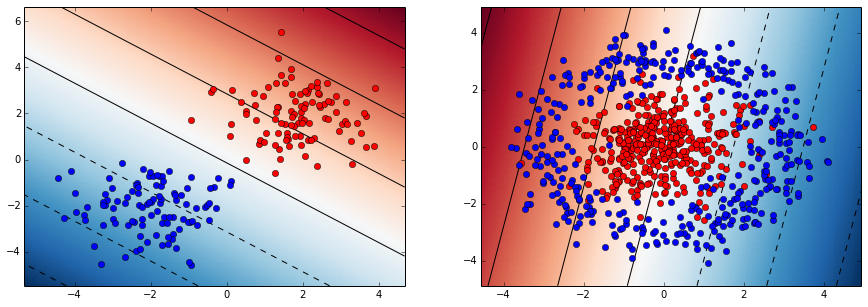

In [10]:
visualize_models(linear_svm_1,linear_svm_2)

<a id ="section2b">Gaussian Kernel</a>

In [11]:
gaussian_c=0.7

gaussian_kernel_1=GaussianKernel(shogun_features_1, shogun_features_1, 100)
gaussian_svm_1=LibSVM(gaussian_c, gaussian_kernel_1, shogun_labels_1)
gaussian_svm_1.train()

gaussian_kernel_2=GaussianKernel(shogun_features_2, shogun_features_2, 100)
gaussian_svm_2=LibSVM(gaussian_c, gaussian_kernel_2, shogun_labels_2)
gaussian_svm_2.train()

True

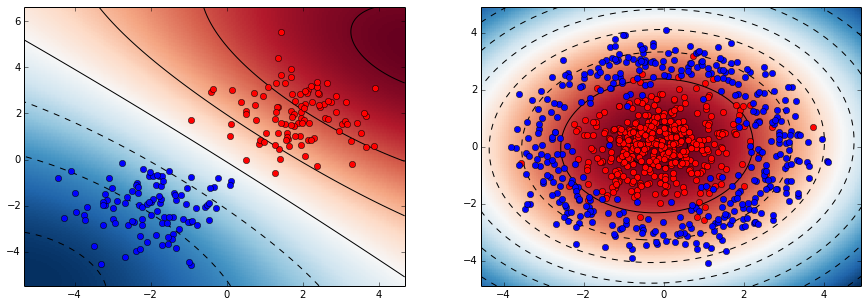

In [12]:
visualize_models(gaussian_svm_1,gaussian_svm_2)

<a id ="section2c">Sigmoid Kernel</a>

In [13]:
sigmoid_c = 0.9

sigmoid_kernel_1 = SigmoidKernel(shogun_features_1,shogun_features_1,200,1,0.5)
sigmoid_svm_1 = LibSVM(sigmoid_c, sigmoid_kernel_1, shogun_labels_1)
sigmoid_svm_1.train()

sigmoid_kernel_2 = SigmoidKernel(shogun_features_2,shogun_features_2,400,2.5,2)
sigmoid_svm_2 = LibSVM(sigmoid_c, sigmoid_kernel_2, shogun_labels_2)
sigmoid_svm_2.train()

True

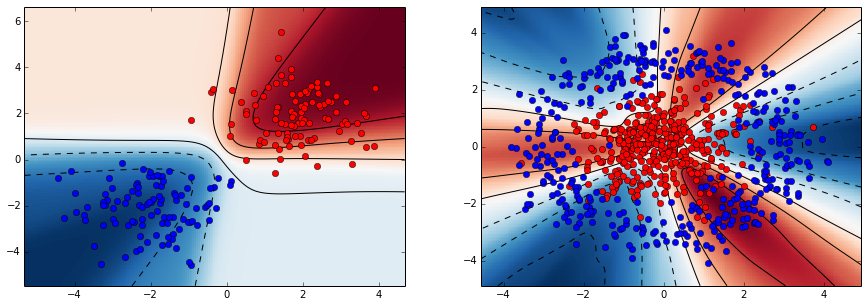

In [14]:
visualize_models(sigmoid_svm_1,sigmoid_svm_2)

<a id ="section2d">Polynomial Kernel</a>

In [15]:
poly_c = 0.5
degree = 4

poly_kernel_1=PolyKernel(shogun_features_1, shogun_features_1, degree, True)
poly_svm_1 = LibSVM(poly_c, poly_kernel_1, shogun_labels_1)
poly_svm_1.train()

poly_kernel_2=PolyKernel(shogun_features_2, shogun_features_2, degree, True)
poly_svm_2 = LibSVM(poly_c, poly_kernel_2, shogun_labels_2)

poly_svm_2.train()

True

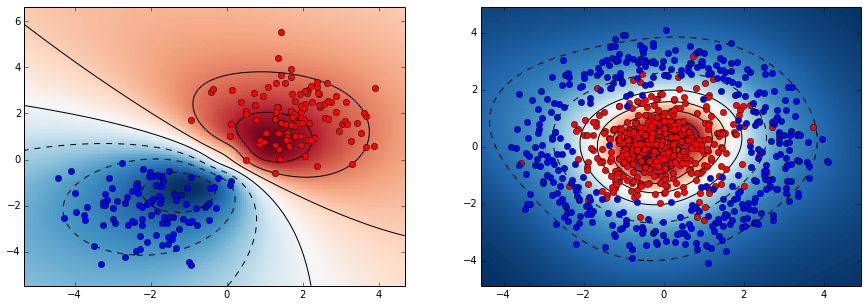

In [16]:
visualize_models(poly_svm_1,poly_svm_2)

## <a id ="section3">Naive Bayes</a>

In [17]:
multiclass_labels_1 = shogun_labels_1.get_labels()
for i in range(0,len(multiclass_labels_1)):
    if multiclass_labels_1[i] == -1:
        multiclass_labels_1[i] = 0

multiclass_labels_2 = shogun_labels_2.get_labels()
for i in range(0,len(multiclass_labels_2)):
    if multiclass_labels_2[i] == -1:
        multiclass_labels_2[i] = 0


shogun_multiclass_labels_1 = MulticlassLabels(multiclass_labels_1)
shogun_multiclass_labels_2 = MulticlassLabels(multiclass_labels_2)

naive_bayes_1 = GaussianNaiveBayes()
naive_bayes_1.set_features(shogun_features_1)
naive_bayes_1.set_labels(shogun_multiclass_labels_1)
naive_bayes_1.train()

naive_bayes_2 = GaussianNaiveBayes()
naive_bayes_2.set_features(shogun_features_2)
naive_bayes_2.set_labels(shogun_multiclass_labels_2)
naive_bayes_2.train()

True

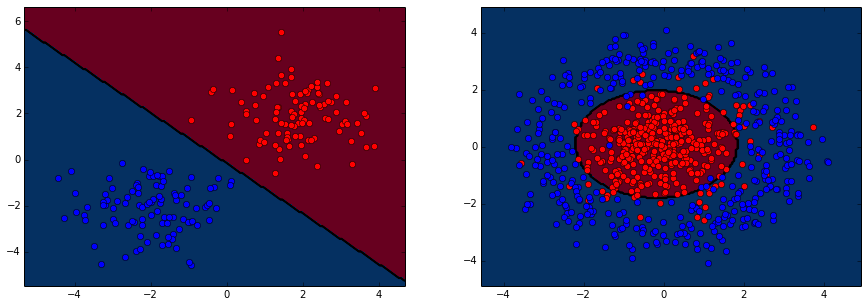

In [18]:
visualize_models(naive_bayes_1,naive_bayes_2,fading=False)

## <a id ="section4">Nearest Neighbors</a>

In [19]:
number_of_neighbors = 10

distances_1 = EuclideanDistance(shogun_features_1, shogun_features_1)
knn_1 = KNN(number_of_neighbors,distances_1,shogun_labels_1)
knn_1.train()

distances_2 = EuclideanDistance(shogun_features_2, shogun_features_2)
knn_2 = KNN(number_of_neighbors,distances_2,shogun_labels_2)
knn_2.train()

True

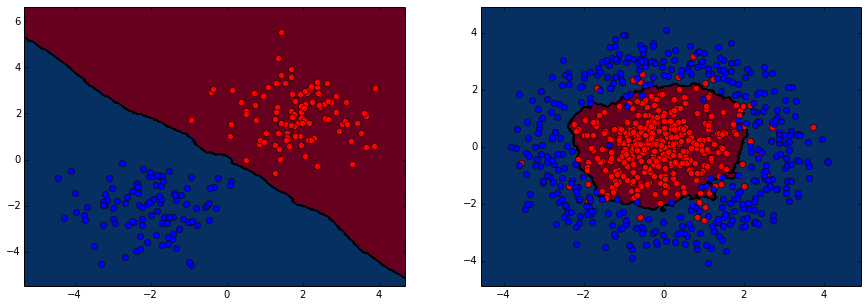

In [20]:
visualize_models(knn_1,knn_2,fading=False)

## <a id ="section5">Linear Discriminant Analysis</a>

In [21]:
gamma = 0.1

lda_1=LDA(gamma, shogun_features_1, shogun_labels_1)
lda_1.train()

lda_2=LDA(gamma, shogun_features_2, shogun_labels_2)
lda_2.train()

True

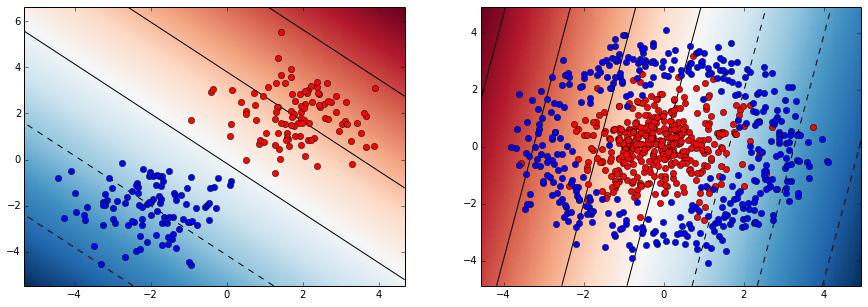

In [22]:
visualize_models(lda_1,lda_2)

## <a id ="section6">Quadratic Discriminant Analysis</a>

In [24]:
qda_1 = QDA(shogun_features_1, shogun_multiclass_labels_1)
qda_1.train()

qda_2 = QDA(shogun_features_2, shogun_multiclass_labels_2)
qda_2.train()

True

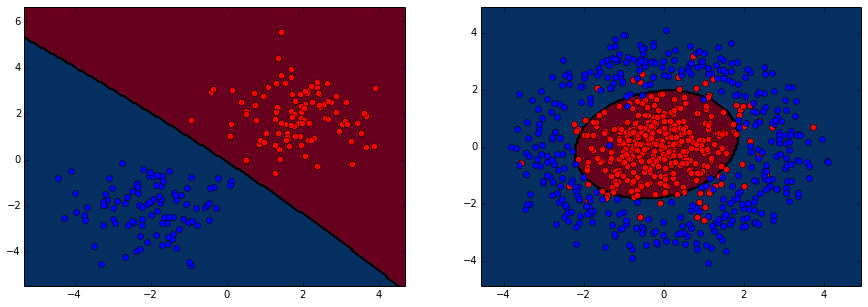

In [25]:
visualize_models(qda_1,qda_2,fading=False)

## <a id ="section7">Gaussian Process</a>

<a id ="section7a">Logit Likelihood model</a>

In [26]:
# create Gaussian kernel with width = 2.0
kernel = GaussianKernel(10, 2)
# create zero mean function
zero_mean = ZeroMean()
# create logit likelihood model
likelihood = LogitLikelihood()
# specify EP approximation inference method
inference_model_1 = EPInferenceMethod(kernel, shogun_features_1, zero_mean, shogun_labels_1, likelihood)
# create and train GP classifier, which uses Laplace approximation
gaussian_process_1 = GaussianProcessClassification(inference_model_1)
gaussian_process_1.train()

inference_model_2 = EPInferenceMethod(kernel, shogun_features_2, zero_mean, shogun_labels_2, likelihood)
gaussian_process_2 = GaussianProcessClassification(inference_model_2)
gaussian_process_2.train()

True

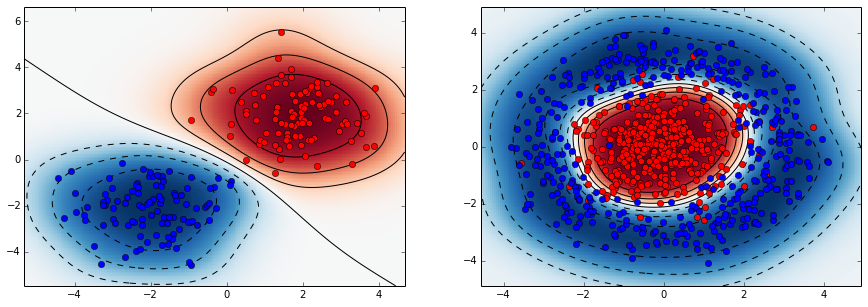

In [27]:
visualize_models(gaussian_process_1,gaussian_process_2)

<a id ="section7b">Probit Likelihood model</a> 

In [28]:
likelihood2 = ProbitLikelihood()

inference_model_11 = EPInferenceMethod(kernel, shogun_features_1, zero_mean, shogun_labels_1, likelihood2)
gaussian_process_11 = GaussianProcessClassification(inference_model_11)
gaussian_process_11.train()

inference_model_22 = EPInferenceMethod(kernel, shogun_features_2, zero_mean, shogun_labels_2, likelihood2)
gaussian_process_22 = GaussianProcessClassification(inference_model_22)
gaussian_process_22.train()

True

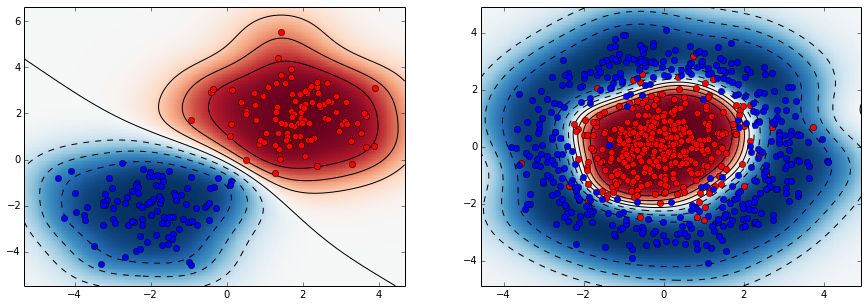

In [29]:
visualize_models(gaussian_process_11,gaussian_process_22)